# Stemming

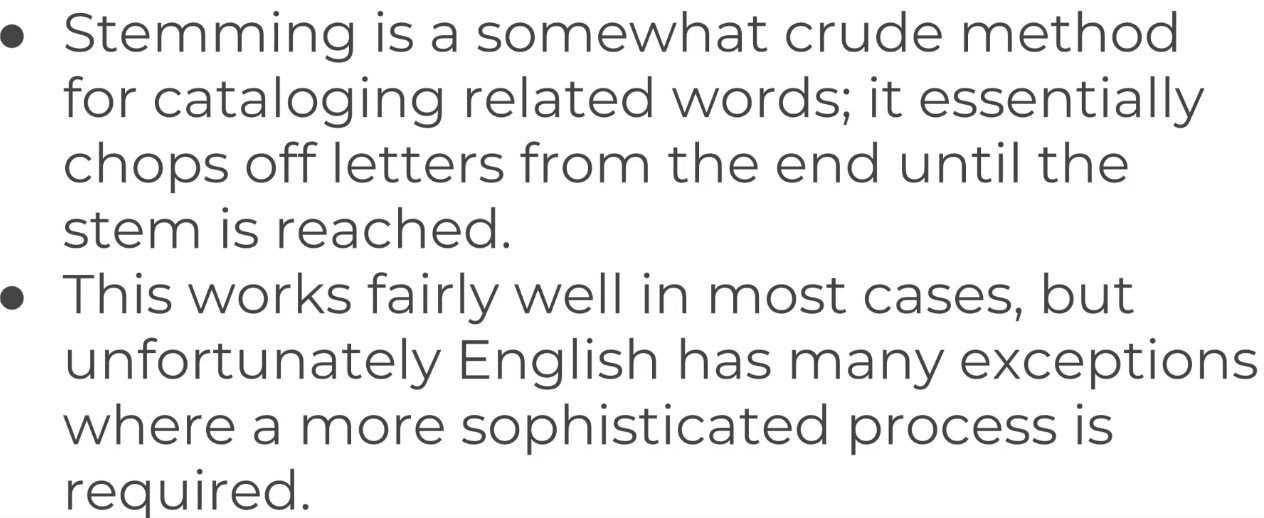

In [1]:
import nltk
from nltk.stem.porter import PorterStemmer

In [2]:
p_stemmer = PorterStemmer()

In [3]:
words = ["run","runner","ran","runs","easily","fairly","fairness"]

In [4]:
for word in words:
    print(word + " ------> " + p_stemmer.stem(word))

run ------> run
runner ------> runner
ran ------> ran
runs ------> run
easily ------> easili
fairly ------> fairli
fairness ------> fair


In [5]:
from nltk.stem.snowball import SnowballStemmer

In [6]:
s_stemmer = SnowballStemmer(language = "english")

In [7]:
for word in words:
        print(word + " ------> " + s_stemmer.stem(word))

run ------> run
runner ------> runner
ran ------> ran
runs ------> run
easily ------> easili
fairly ------> fair
fairness ------> fair


In [8]:
words = ["generous","generation","generously","generate","general"]
for word in words:
        print(word + " ------> " + s_stemmer.stem(word) + " ------> " + s_stemmer.stem(word))

generous ------> generous ------> generous
generation ------> generat ------> generat
generously ------> generous ------> generous
generate ------> generat ------> generat
general ------> general ------> general


# Lemmatization

In [9]:
import spacy

In [10]:
nlp = spacy.load("en_core_web_sm")

In [11]:
doc1 = nlp(u"I am a runner running in a reace because I love to run since I ran today")

In [12]:
for token in doc1:
    print(token.text,"\t",token.pos_,"\t",token.lemma,"\t",token.lemma_)
    # pos part of speech

I 	 PRON 	 4690420944186131903 	 I
am 	 AUX 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
reace 	 NOUN 	 17646165933700853792 	 reace
because 	 SCONJ 	 16950148841647037698 	 because
I 	 PRON 	 4690420944186131903 	 I
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 SCONJ 	 10066841407251338481 	 since
I 	 PRON 	 4690420944186131903 	 I
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today


In [13]:
#number for spesific lemma 

In [14]:
def show_lemmas():
    for token in text:
        token_text = token.text
        pos = token.pos_
        lemma = token.lemma
        lemma_text = token.lemma_

        print(f'{token_text:{12}} {pos:{6}} {lemma:<{22}} {lemma_text}')


In [15]:
doc2 = nlp(u"I saw ten mice today!")
for token in doc2:
    print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

I            PRON   4690420944186131903    I
saw          VERB   11925638236994514241   see
ten          NUM    7970704286052693043    ten
mice         NOUN   1384165645700560590    mouse
today        NOUN   11042482332948150395   today
!            PUNCT  17494803046312582752   !


# Stop Words

In [16]:
print(nlp.Defaults.stop_words)

{'whoever', 'rather', 'fifty', 'a', 'beyond', '’m', 'either', 'everyone', 'seem', 'anywhere', 'five', 'anyway', 'almost', 'onto', 'over', 'everywhere', 'alone', 'and', 'none', 'did', 'elsewhere', 'has', 'latterly', 'whole', 'make', 'whom', 'formerly', 'something', 'per', 'made', 'than', 'above', 'thereupon', 'several', 'against', 'every', 'hereupon', 'third', 'no', 'but', 'empty', 'you', 'thereby', '’d', 'ca', 'was', 'hundred', 'whereupon', 'anyhow', 'if', 'such', 'itself', 'once', 'ten', '’s', 'three', 'whatever', 'get', 'eight', 'only', 'how', 'namely', 'him', 'seeming', 'beforehand', 'whereas', 'yourselves', 'off', '‘m', 'without', 'at', 'do', 'we', 'whether', 'those', 'nevertheless', 'own', 'doing', 're', 'your', 'might', 'his', 'move', 'much', 'hence', 'together', 'thence', 'by', 'wherein', "n't", 'latter', 'whereby', 'twelve', 'last', 'any', 'who', 'beside', 'due', 'seemed', 'they', 'say', 'around', 'few', 'about', 'this', 'all', 'what', 'whose', 'see', 'one', 'mostly', 'often', 

In [17]:
len(nlp.Defaults.stop_words)

326

In [18]:
nlp.vocab["is"]

In [19]:
nlp.vocab["is"].is_stop

True

In [20]:
nlp.vocab["life"].is_stop

False

In [21]:
nlp.Defaults.stop_words.add("btw")  #by the way

In [22]:
nlp.vocab["btw"].is_stop = True
len(nlp.Defaults.stop_words)

327

In [23]:
nlp.Defaults.stop_words.remove("beyond")  #by the way

In [24]:
nlp.vocab["beyond"].is_stop = False


In [25]:
nlp.vocab["beyond"].is_stop

False

# Vocabulary and Matching

In [26]:
from spacy.matcher import Matcher


In [27]:
matcher = Matcher(nlp.vocab)

## Other token attributes
Besides lemmas, there are a variety of token attributes we can use to determine matching rules:
<table><tr><th>Attribute</th><th>Description</th></tr>

<tr ><td><span >`ORTH`</span></td><td>The exact verbatim text of a token</td></tr>
<tr ><td><span >`LOWER`</span></td><td>The lowercase form of the token text</td></tr>
<tr ><td><span >`LENGTH`</span></td><td>The length of the token text</td></tr>
<tr ><td><span >`IS_ALPHA`, `IS_ASCII`, `IS_DIGIT`</span></td><td>Token text consists of alphanumeric characters, ASCII characters, digits</td></tr>
<tr ><td><span >`IS_LOWER`, `IS_UPPER`, `IS_TITLE`</span></td><td>Token text is in lowercase, uppercase, titlecase</td></tr>
<tr ><td><span >`IS_PUNCT`, `IS_SPACE`, `IS_STOP`</span></td><td>Token is punctuation, whitespace, stop word</td></tr>
<tr ><td><span >`LIKE_NUM`, `LIKE_URL`, `LIKE_EMAIL`</span></td><td>Token text resembles a number, URL, email</td></tr>
<tr ><td><span >`POS`, `TAG`, `DEP`, `LEMMA`, `SHAPE`</span></td><td>The token's simple and extended part-of-speech tag, dependency label, lemma, shape</td></tr>
<tr ><td><span >`ENT_TYPE`</span></td><td>The token's entity label</td></tr>

</table>

In [28]:
# SolarPower
# Solar-power
# Solar power
pattern1 = [{'LOWER':"solarpower"}]
pattern2 = [{"LOWER":"solar"},{"IS_PUNCT":True},{"LOWER":"power"}]
pattern3 = [{"LOWER":"solar"},{"LOWER":"power"}]

In [29]:
matcher.add("SolarPower",[pattern1,pattern2,pattern3])

In [30]:
doc = nlp(u"The Solar Power industry continues to grow a solarpower increases. Solar-power is amazing.")

In [31]:
found_matches = matcher(doc)

In [32]:
print(found_matches)

[(8656102463236116519, 1, 3), (8656102463236116519, 8, 9), (8656102463236116519, 11, 14)]


In [33]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get string representation
    span = doc[start:end]                    # get the matched span
    print(match_id, string_id, start, end, span.text)

8656102463236116519 SolarPower 1 3 Solar Power
8656102463236116519 SolarPower 8 9 solarpower
8656102463236116519 SolarPower 11 14 Solar-power


In [34]:
matcher.remove("SolarPower")

This found both two-word patterns, with and without the hyphen!

The following quantifiers can be passed to the `'OP'` key:
<table><tr><th>OP</th><th>Description</th></tr>

<tr ><td><span >\!</span></td><td>Negate the pattern, by requiring it to match exactly 0 times</td></tr>
<tr ><td><span >?</span></td><td>Make the pattern optional, by allowing it to match 0 or 1 times</td></tr>
<tr ><td><span >\+</span></td><td>Require the pattern to match 1 or more times</td></tr>
<tr ><td><span >\*</span></td><td>Allow the pattern to match zero or more times</td></tr>
</table>


In [35]:
#solarpower
#solar.power
pattern1 = [{"LOWER":"solarpower"}]
pattern2 = [{"LOWER":"solar"},{"IS_PUNCT":True},{"OP":"*"},{"LOWER":"power"}]

In [36]:
matcher.add("SolarPower",[pattern1,pattern2])


In [37]:
doc2 = nlp(u"Solar--power is solarpower yay solar*power !")

In [38]:
found_matches= matcher(doc2)

In [39]:
print(found_matches)

[(8656102463236116519, 0, 3), (8656102463236116519, 4, 5)]


In [40]:
# for more info
# https://spacy.io/usage/rule-based-matching

# Phrase Matching

In [41]:
from spacy.matcher import PhraseMatcher

In [42]:
matcher = PhraseMatcher(nlp.vocab)

In [43]:
with open("reaganomics.txt") as f:
    doc3 = nlp(f.read())

In [44]:
phrase_list = ["voodoo economics","supply-side economics","trickle-down economics","free-market economics"]

In [45]:
phrase_patterns = [nlp(text) for text in phrase_list]

In [46]:
phrase_patterns

[voodoo economics,
 supply-side economics,
 trickle-down economics,
 free-market economics]

In [47]:
type(phrase_patterns[0])

spacy.tokens.doc.Doc

In [49]:
matcher.add("EconMatcher",None,*phrase_patterns)

In [50]:
found_matches = matcher(doc3)

In [51]:
found_matches

[(3680293220734633682, 41, 45),
 (3680293220734633682, 49, 53),
 (3680293220734633682, 54, 56),
 (3680293220734633682, 61, 65),
 (3680293220734633682, 673, 677),
 (3680293220734633682, 2987, 2991)]

In [53]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get string representation
    span = doc3[start:end]                    # get the matched span
    print(match_id, string_id, start, end, span.text)

3680293220734633682 EconMatcher 41 45 supply-side economics
3680293220734633682 EconMatcher 49 53 trickle-down economics
3680293220734633682 EconMatcher 54 56 voodoo economics
3680293220734633682 EconMatcher 61 65 free-market economics
3680293220734633682 EconMatcher 673 677 supply-side economics
3680293220734633682 EconMatcher 2987 2991 trickle-down economics
